# Accompanying code for ``A Lyapunov function construction for the Douglas-Rachford operator in a non-convex setting''

by Ohad Giladi and Björn S. Rüffer

This jupyter notebook is to be used with a SageMath v7.x or v8.0 kernel (other versions may work as well). It complements the [manuscript](link to be inserted here) by the same name and provides computational routines for further exploration.

In [1]:
# test configuration for the pictures in this file
angles=(pi/3,2*pi/5) # theta_1 and theta_2
initial_conditions=[(-5,5), (-5,-5)] # just two different initial conditions

## Routines that implement the Douglas-Rachford operator

In [2]:
def P_A1(x,theta):
    '''Project onto line through (-1/2,0).'''
    return (1/2*(2*x[0]*cos(theta) + 2*x[1]*sin(theta) + cos(theta))*cos(theta) - 1/2,\
            1/2*(2*x[0]*cos(theta) + 2*x[1]*sin(theta) + cos(theta))*sin(theta))
def P_A2(x,theta):
    '''Project onto line through (1/2,0).'''
    return (1/2*(2*x[0]*cos(theta) + 2*x[1]*sin(theta) - cos(theta))*cos(theta) + 1/2,\
            1/2*(2*x[0]*cos(theta) + 2*x[1]*sin(theta) - cos(theta))*sin(theta))

def R_A1(x,theta):
    '''Reflect across line through (-1/2,0).'''
    return 2*vector(P_A1(x,theta))-vector(x)

def R_A2(x,theta):
    '''Reflect across line through (1/2,0).'''
    return 2*vector(P_A2(x,theta))-vector(x)

def R_A(x,theta1,theta2):
    '''Reflect across the set A which consists of the two lines A1 and A2.'''
    if reduce(lambda a,b: a+b, map(lambda a: a^2, vector(P_A1(x,theta1))-vector(x))) \
        < reduce(lambda a,b: a+b, map(lambda a: a^2, vector(P_A2(x,theta2))-vector(x))):
    # A1 is strictly closer than A2
        return R_A1(x,theta1)
    else:
        return R_A2(x,theta2)

def R_B(x):
    '''Reflect across the line B, which is the x-axis.'''
    return (x[0],-x[1])

def T_AB(x,theta1,theta2):
    '''Douglas-Rachford operator for the sets A and B.'''
    return ((vector(R_B(R_A(x,theta1,theta2)))+vector(x))/2).list()

def T_A1B(x,theta1,theta2):
    '''Douglas-Rachford operator for the sets A1 and B.'''
    return ((vector(R_B(R_A1(x,theta1)))+vector(x))/2).list()
def T_A2B(x,theta1,theta2):
    '''Douglas-Rachford operator for the sets A2 and B.'''
    return ((vector(R_B(R_A2(x,theta2)))+vector(x))/2).list()

def V1(x):
    '''Quadratic distance to the intersection point p1 is a Lyapunov function for the Douglas-Rachford operator
    with respect to A1 and B. It is also a local Lyapunov function (in a neighbourhood of the intersection 
    point p1) for the Douglas-Rachford operator with respect to A and B.'''
    return (x[0]+1/2)^2+x[1]^2
def V2(x):
    '''Quadratic distance to the intersection point p2 is a Lyapunov function for the Douglas-Rachford operator
    with respect to A2 and B. It is also a local Lyapunov function (in a neighbourhood of the intersection 
    point p2) for the Douglas-Rachford operator with respect to A and B.'''
    return (x[0]-1/2)^2+x[1]^2


# Code for visualisation

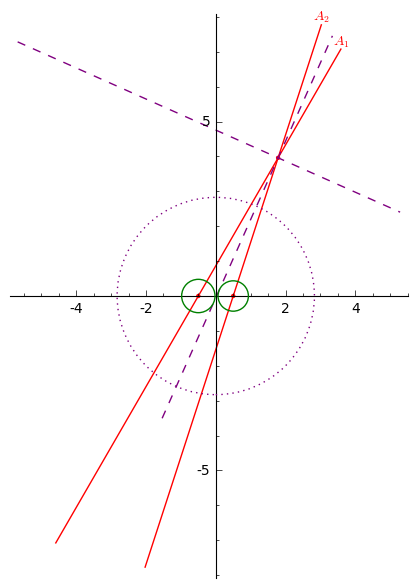

In [3]:
def picture_it(theta1,theta2):
    '''Plot the three lines A1, A2, and B considered in the manuscript. The only parameters are the two
    angles theta1 and theta2 between A1 and B and, respectively, A2 and B.

    This function returns a plot object that can be drawn with show() or saved to a file with its 
    .save('filename') method. It is also possible to add trajectory plots to this plot object before 
    showing it.
    
    This function draws the lines A1 and A2 in red. It does not draw the line B as it coincides with 
    the x-axis. It then draws dashed, purple lines to show the set D_3 in the paper, which is also the
    boundary of the sets D_1 and D_2.
    
    Two green circles denote the discs where the respective Douglas-Rachford operator corresponding to 
    A_i and B coincides with the one for A and B and where local convergence can be guaranteed with the 
    local Lyapunov function V_i.
    
    The purple, dashed circle denotes the disc outside which both Lyapunov functions are decreased by the 
    Douglas-Rachford operator for A and B.
    '''
    p1=vector((-1/2,0)) # intersection points p1 and p2 in the paper
    p2=vector((1/2,0))
    # radius of the big circle outside which distance to either Ei is decreased along T_AB
    R=2*sqrt(2)*max(1,abs(cot(theta1)),abs(cot(theta2)))
    # intersection point between A1 and A2
    I=vector((-cos(theta1)*sin(theta2)/(cos(theta2)*sin(theta1) - cos(theta1)*sin(theta2)) - 1/2, -sin(theta1)*sin(theta2)/(cos(theta2)*sin(theta1) - cos(theta1)*sin(theta2))))
    # normal vectors of the lines splitting the angles between A1 and A2
    n1=vector([cos((theta1+theta2)/2),sin((theta1+theta2)/2)])
    n2=vector((n1[1],-n1[0]))
    # direction vectors of the lines A1 and A2
    l1=vector((cos(theta1),sin(theta1)))
    l2=vector((cos(theta2),sin(theta2)))
    # radii of the green circles around p1 and p2 where distance to Ei is a Lyapunov function
    d1=min_symbolic(abs((p1-I).inner_product(n1)),abs((p1-I).inner_product(n2)))
    d2=min_symbolic(abs((p2-I).inner_product(n1)),abs((p2-I).inner_product(n2)))
    p=  point((-cos(theta1)*sin(theta2)/(cos(theta2)*sin(theta1) - cos(theta1)*sin(theta2)) - 1/2, -sin(theta1)*sin(theta2)/(cos(theta2)*sin(theta1) - cos(theta1)*sin(theta2))),color='red') \
        + line([(-1/2,0),(-1/2+(norm(I)+R+1)*cos(theta1),0+(norm(I)+R+1)*sin(theta1))],color='red') \
        + line([(-1/2,0),(-1/2-(norm(I)+R+1)*cos(theta1),0-(norm(I)+R+1)*sin(theta1))],color='red') \
        + point((-1/2,0),color='red') \
        \
        + line([(1/2,0),(1/2+(norm(I)+R+1)*cos(theta2),0+(norm(I)+R+1)*sin(theta2))],color='red') \
        + line([(1/2,0),(1/2-(norm(I)+R+1)*cos(theta2),0-(norm(I)+R+1)*sin(theta2))],color='red') \
        + point((1/2,0),color='red')\
        \
        + circle(p1,d1,color='green')\
        + circle(p2,d2,color='green')\
        + line([I-(norm(I)+R+1)*n1,I+(R+1)*n1],color='purple',linestyle="--")\
        + line([I-(norm(I)+R+1)*n2,I+(R+1)*n2],color='purple',linestyle="--")\
        + circle((0,0),R,color='purple',linestyle=":")\
        \
        + text("$A_1$",p1+(norm(I)+R+1)*l1,vertical_alignment='bottom',color="red")\
        + text("$A_2$",p2+(norm(I)+R+1)*l2,vertical_alignment='bottom',color="red")
    p.set_aspect_ratio(1.0)
    return p

P=picture_it(*angles)
show(P) 
# P.save("DR for three (2+1) lines.svg") # these should both work
# P.save("DR for three (2+1) lines.pdf")

Compute 10 steps of a trajectory emerging from (-5, 5).
Compute 10 steps of a trajectory emerging from (-5, -5).


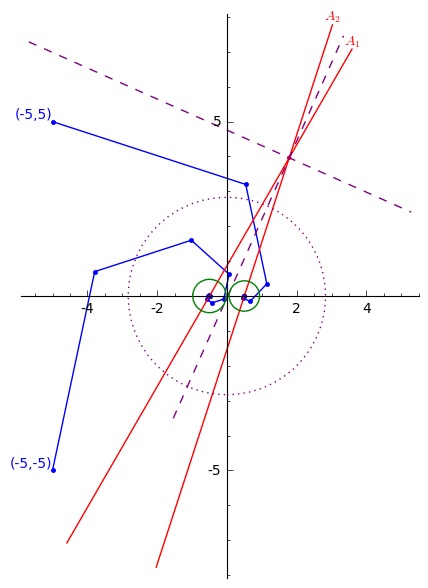

In [4]:
## create a sample trajectory starting at (-2,2) with 10 steps
T=[]
for ic in initial_conditions:
    X=[ic]
    for k in range(10):
        X.append(map(n,T_AB(X[-1],*angles))) # numerical evaluation essential for speed
    print("Compute %s steps of a trajectory emerging from %s." % (len(X)-1,X[0]))
    T.append(line(X,marker='.')+text("(%s,%s)" % X[0], X[0],vertical_alignment="bottom",horizontal_alignment="right"))
show(sum(T)+P)